###  Tarea 1 Cosmología

Benjamín Guerra Cuadra

### P6.

In [2]:
import camb

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos un modelo
pars = camb.CAMBparams()

# Entregamos valores a los parámetros
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.12, omk=0, mnu=0.06)
pars.InitPower.set_params(ns=0.965)

# Obtenemos lo resultados del modelo
results = camb.get_background(pars)

# Definimos un rango de valores de z (en escala logaritmica)
z_vals = np.logspace(-4, 3.5, 500)  # De z=1e-4 (far future) a z=10^3.5 (early universe)

In [18]:
#Separamos los resultados para cada densidad
omegam = results.get_Omega('baryon',z=z_vals) + results.get_Omega('cdm',z=z_vals) #Densidad de materia = Densidad de Materia Bariónica + Densidad de CDM
omegar = results.get_Omega('photon',z=z_vals) + results.get_Omega('neutrino',z=z_vals) #Densidad de Radiación = Densidad de Fotones + Densidad de Neutrinos
omegaL = results.get_Omega('de',z=z_vals) #Densidad de Dark Energy
omegak = results.get_Omega('K',z=z_vals) # Densidad de Curvatura

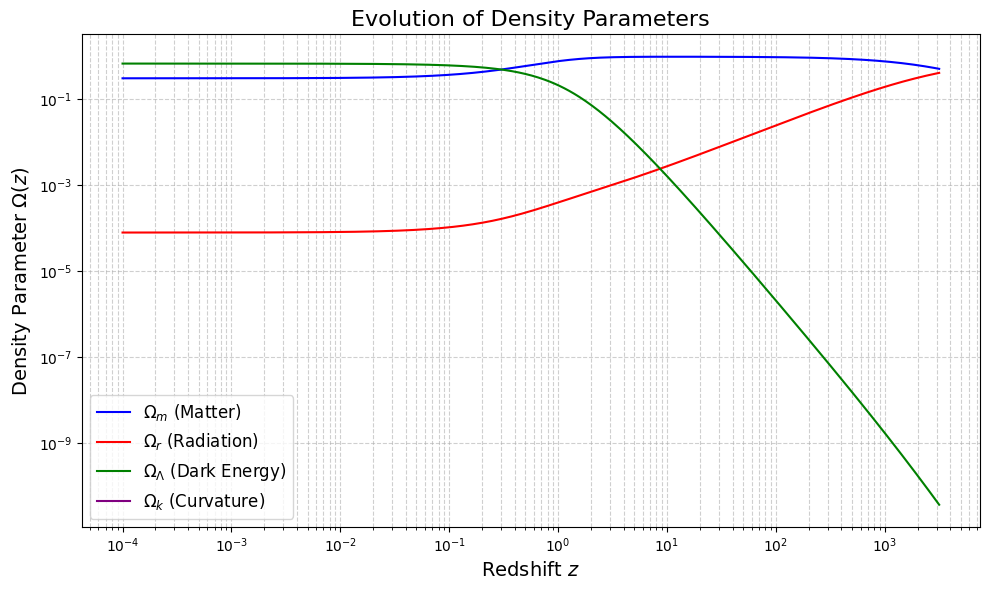

In [19]:

# Ploteamos los resultados
plt.figure(figsize=(10, 6))
plt.loglog(z_vals, omegam, label=r'$\Omega_m$ (Matter)', color='blue')
plt.loglog(z_vals, omegar, label=r'$\Omega_r$ (Radiation)', color='red')
plt.loglog(z_vals, omegaL, label=r'$\Omega_\Lambda$ (Dark Energy)', color='green')
plt.loglog(z_vals, omegak, label=r'$\Omega_k$ (Curvature)', color='purple')


plt.xlabel('Redshift $z$', fontsize=14)
plt.ylabel('Density Parameter $\Omega(z)$', fontsize=14)
plt.title('Evolution of Density Parameters', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()


### P7.

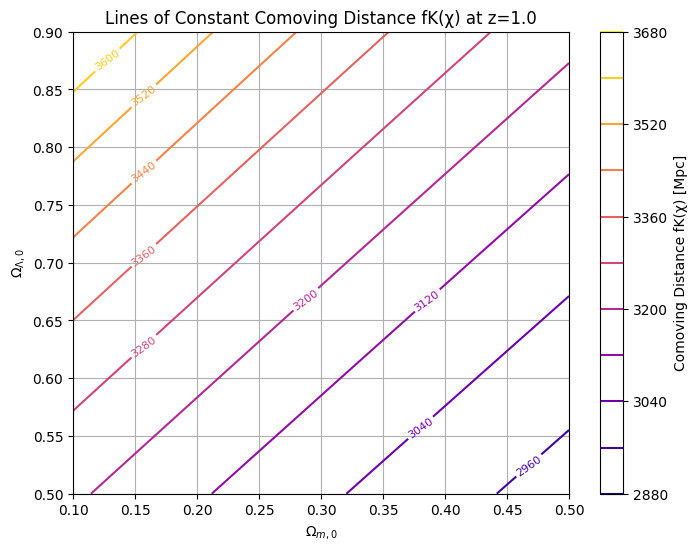

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model

# Creamos una función para la distancia comovente que dependa de las densidades 
def comoving_distance(z, Omega_m, Omega_lambda):
    # Seteamos los parámetros
    pars = camb.CAMBparams()
    Omega_k = 1.0 - Omega_m - Omega_lambda  # Consideramos componente de materia y energía oscura
    pars.set_cosmology(H0=70, ombh2=0.022, omch2=Omega_m * (70 / 100)**2, omk=Omega_k)
    pars.set_dark_energy(w=-1.0) 
    
    # Seteamos valores de redshift y calculamos distancias
    pars.set_matter_power(redshifts=[z], kmax=2.0)
    results = camb.get_background(pars)
    
    # Retorna la distancia comovente
    return results.comoving_radial_distance(z)

# Definimos un grid para la densidad de materia y la de energía oscura
Omega_m_values = np.linspace(0.1, 0.5, 50)
Omega_lambda_values = np.linspace(0.5, 0.9, 50)
Omega_m_grid, Omega_lambda_grid = np.meshgrid(Omega_m_values, Omega_lambda_values)

# Fijamos un valor de redshift
z = 1.0

# Calculamos f_k para cada combinación de omega_m y omega_lambda
fK_values = np.zeros_like(Omega_m_grid)
for i in range(Omega_m_grid.shape[0]):
    for j in range(Omega_m_grid.shape[1]):
        Omega_m = Omega_m_grid[i, j]
        Omega_lambda = Omega_lambda_grid[i, j]
        fK_values[i, j] = comoving_distance(z, Omega_m, Omega_lambda)

# Ploteamos los resultados
plt.figure(figsize=(8, 6))
contour = plt.contour(Omega_m_grid, Omega_lambda_grid, fK_values, levels=10, cmap='plasma')
plt.clabel(contour, inline=True, fontsize=8)
plt.title(f'Lines of Constant Comoving Distance fK(χ) at z={z}')
plt.xlabel(r'$\Omega_{m,0}$')
plt.ylabel(r'$\Omega_{\Lambda,0}$')
plt.grid(True)
plt.colorbar(contour, label=r'Comoving Distance fK(χ) [Mpc]')
plt.show()
